In [1]:
import numpy as np
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

/Users/cporras/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.2.0


In [2]:
######### TAKES A LONG TIME #########
callset = allel.read_vcf('ALL.chr21.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz')

In [3]:
sorted(callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

In [4]:
GT = callset["calldata/GT"]

In [32]:
np.where(GT == 2)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [73]:
GT[266,511]

array([0, 2], dtype=int8)

In [41]:
no_zero = np.where(callset['calldata/GT']!= 0)

In [47]:
print(no_zero)

(array([      0,       1,       1, ..., 1105537, 1105537, 1105537]), array([ 318,  356, 1689, ..., 1071, 1304, 2192]), array([1, 1, 1, ..., 0, 0, 0]))


In [66]:
callset["calldata/GT"].shape

(1105538, 2504, 2)

In [38]:
callset["samples"]

array(['HG00096', 'HG00097', 'HG00099', ..., 'NA21142', 'NA21143',
       'NA21144'], dtype=object)

In [27]:
callset["variants/POS"].shape

(1105538,)

In [11]:
gt = allel.GenotypeArray(callset['calldata/GT'])

In [48]:
ALT = callset["variants/ALT"]

In [74]:
ALT[266]

array(['A', 'C', ''], dtype=object)

In [58]:
for i in range(1000):
    if ALT[i][1] != "":
        print(ALT[i])

['A' 'C' '']
['C' 'G' '']
['C' 'T' '']
['G' 'T' '']
['A' 'T' '']
['GATGAA' 'G' '']


In [75]:
REF[266]

'T'

In [36]:
REF = np.array(callset["variants/REF"])
print(REF)

['G' 'C' 'A' ... 'T' 'A' 'C']


In [10]:
mono = callset["calldata/GT"]

In [15]:
mono[mono==2] = 1

In [16]:
mono[mono==3] = 1

In [19]:
np.where(mono == 3)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [20]:
conv = np.sum(mono,axis=2)

In [21]:
conv.shape

(1105538, 2504)

In [22]:
from sklearn.decomposition import PCA

In [24]:
# TAKES FOREVER!!

In [38]:
pca = PCA(n_components=4)
PCs = pca.fit_transform(conv)

In [34]:
x = conv.T@PCs[:,0]

In [35]:
y = conv.T@PCs[:,1]

In [39]:
z = conv.T@PCs[:,2]

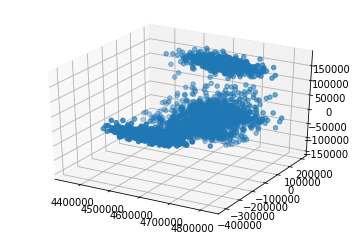

In [48]:
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(x,y,z)



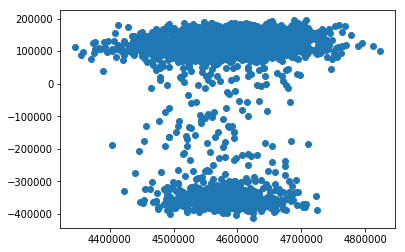

In [50]:
plt.scatter(x,y)